# Get Data

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("apple-twitter-sentiment-texts.csv")
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


# Conduct Sentiment Analysis

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# from nltk.corpus import stopwords as nltk
# from nltk.tokenize import word_tokenize
import nltk
import ssl

In [26]:
sentiment_analyzer = SentimentIntensityAnalyzer()

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [27]:
negative = neutral = positive = compound = counter = 0
overall_sentiment = []

stop_words = set(stopwords.words('english'))

len_tweet = lambda x: len(x)
ctr = 0
total_len = 0

for tweet in df['text']:
  ctr+=1
  total_len += len_tweet(tweet)

avg_tweet_len = total_len/ctr
print(f'avg tweet length before stopword removal: {avg_tweet_len}')

ctr = 0
total_len = 0

for tweet in df['text']:
  word_tokens = word_tokenize(tweet)
  tweet = [w for w in word_tokens if w.lower() not in stop_words]
  tweet = " ".join(tweet)
  ctr+=1
  total_len += len_tweet(tweet)

avg_tweet_len = total_len/ctr
print(f'avg tweet length after stopword removal: {avg_tweet_len}')

avg tweet length before stopword removal: 95.34171779141104
avg tweet length after stopword removal: 83.7840490797546


In [29]:
# determine sentiment for each tweet
for tweet in df['text']:
    tweet = tweet.strip().lower()
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    negative += sentiment['neg']
    neutral += sentiment['neu']
    positive += sentiment['pos']
    compound += sentiment['compound']
    counter += 1
    calc_sentiment = lambda x: "POS" if x > 0 else ("NEG" if x < 0 else "NEU")
    overall_sentiment.append(calc_sentiment(sentiment['compound']))

In [31]:
# avg negative
print(f'The average level of negativity for these tweets is: {negative/counter}. (Slightly negative)')

# avg neutral
print(f'The average level of neutrality for these tweets is: {neutral/counter}. (Heavily neutral)')

# avg positive
print(f'The average level of positivity for these tweets is: {positive/counter}. (Slighly positive)')

# avg compound (avg sentiment of all tweets)
print(f'The overall sentiment for these tweets is: {compound/counter}. This indicates the average sentiment is slightly negative.')


The average level of negativity for these tweets is: 0.09893803680981594. (Slightly negative)
The average level of neutrality for these tweets is: 0.8136871165644183. (Heavily neutral)
The average level of positivity for these tweets is: 0.08738404907975465. (Slighly positive)
The overall sentiment for these tweets is: -0.017098527607361993. This indicates the average sentiment is slightly negative.


Apple had 1082 negative tweets
Apple had 1114 neutral tweets
Apple had 1064 positive tweets


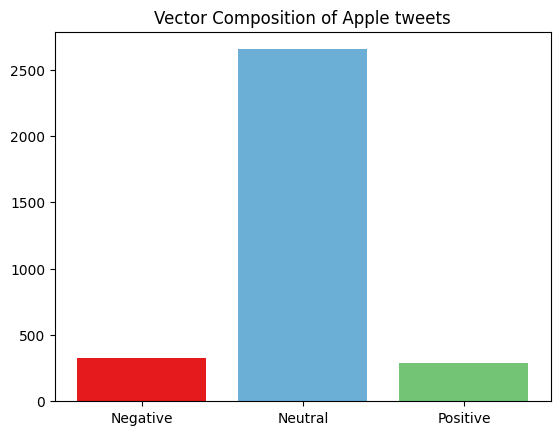

In [32]:
labels = ["Negative", "Neutral", "Positive"]
data = [negative, neutral, positive]
colors = ['#e41a1c', '#6baed6', '#74c476']

plt.title("Vector Composition of Apple tweets")
plt.bar(labels, data, color=colors)

# num neg, pos, neutral
print(f'Apple had {overall_sentiment.count("NEG")} negative tweets')
print(f'Apple had {overall_sentiment.count("NEU")} neutral tweets')
print(f'Apple had {overall_sentiment.count("POS")} positive tweets')

Apple had 1082 negative tweets
Apple had 1114 neutral tweets
Apple had 1064 positive tweets


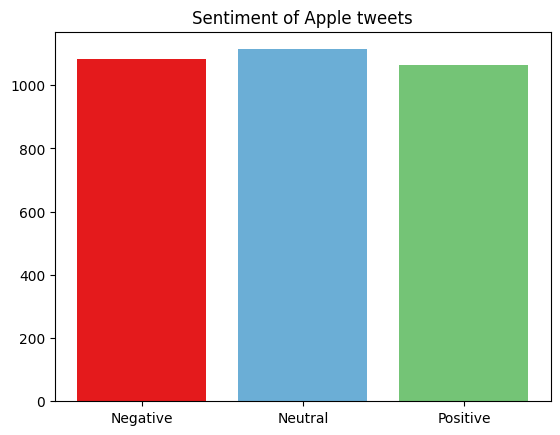

In [33]:
labels = ["Negative", "Neutral", "Positive"]
data = [overall_sentiment.count("NEG"), overall_sentiment.count("NEU"), overall_sentiment.count("POS")]
colors = ['#e41a1c', '#6baed6', '#74c476']

plt.title("Sentiment of Apple tweets")
plt.bar(labels, data, color=colors)

# num neg, pos, neutral
print(f'Apple had {overall_sentiment.count("NEG")} negative tweets')
print(f'Apple had {overall_sentiment.count("NEU")} neutral tweets')
print(f'Apple had {overall_sentiment.count("POS")} positive tweets')

<BarContainer object of 2 artists>

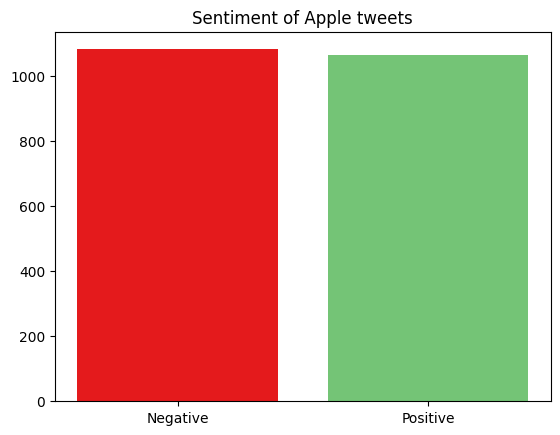

In [34]:
labels = ["Negative", "Positive"]
data = [overall_sentiment.count("NEG"), overall_sentiment.count("POS")]
colors = ['#e41a1c', '#74c476']
plt.title("Sentiment of Apple tweets")
plt.bar(labels, data, color=colors)

# Build a Word Cloud

In [35]:
from wordcloud import WordCloud

In [36]:
text = " ".join(review for review in df.text)
print ("There are {} words in the all the tweets.".format(len(text)))

There are 157036 words in the all the tweets.


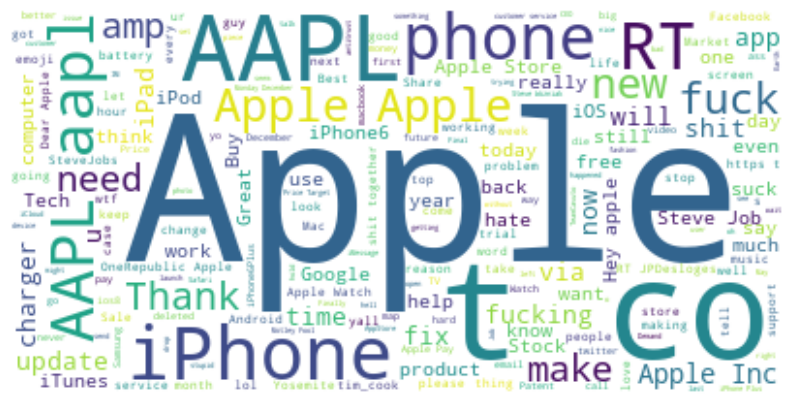

In [38]:
# build a wordcloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()